# Analyse af COVID-19 data

## Del 1: indlæs data
0. Importere `pandas` og brug pandas.read_csv(path) til at hente data direkte fra GitHub-linket.

    (https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-26-2020.csv)

In [13]:
import pandas as pd

date = '05-26-2020'
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-26-2020.csv'

df = pd.read_csv(path)

1. Skimmelæs doc for bibliotek [datetime](https://docs.python.org/3/library/datetime.html)
2. Brug `datetime` til at specificere en dato.
3. Konstruér fil-stien ud fra den dato og hente dataen.
4. Brug `df.head()` og `df.info()` for at få overblik af dataframe. Find ud af, hvilke kolonner der findes (fx Country_Region, Confirmed, Deaths, Recovered).

In [7]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-27 02:32:31,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-27 02:32:31,30.295065,-92.414197,395,18,0,377,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-27 02:32:31,37.767072,-75.632346,758,11,0,747,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-27 02:32:31,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-27 02:32:31,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3451 entries, 0 to 3450
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3012 non-null   float64
 1   Admin2          3012 non-null   object 
 2   Province_State  3266 non-null   object 
 3   Country_Region  3451 non-null   object 
 4   Last_Update     3451 non-null   object 
 5   Lat             3379 non-null   float64
 6   Long_           3379 non-null   float64
 7   Confirmed       3451 non-null   int64  
 8   Deaths          3451 non-null   int64  
 9   Recovered       3451 non-null   int64  
 10  Active          3451 non-null   int64  
 11  Combined_Key    3451 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 323.7+ KB


## Del 2: datarensning

Læs artiklen [Pythonic Data Cleaning With pandas and NumPy](https://realpython.com/python-data-cleaning-numpy-pandas/)
Rense og konstruér dataframe `df`, der indholde kolonerne "Country", "Latitude", "Longitude", "Confirmed", "Deaths", "Recovered" og "Active". 

In [14]:
to_drop = ['FIPS',
           'Admin2',
           'Province_State',
           'Last_Update',
           'Combined_Key']
df.drop(to_drop, inplace=True, axis=1)

In [15]:
df.head()

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,395,18,0,377
2,US,37.767072,-75.632346,758,11,0,747
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,7,0,0,7


In [16]:
new_names = {'Country_Region': 'Country',
             'Lat': 'Latitude',
             'Long_': 'Longitude'}
df.rename(columns=new_names, inplace=True)

In [17]:
df.head()

,Country,Latitude,Longitude,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,395,18,0,377
2,US,37.767072,-75.632346,758,11,0,747
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,7,0,0,7


## Del 3: gruppér data
1. Gruppér evt. efter "Country" og summér antal Confirmed og Deaths.
2. Find de 10 lande med flest smittede den dag.

In [23]:
to_drop = ['Latitude',
           'Longitude']
groupeddf = df.drop(to_drop, inplace=False, axis=1)

In [46]:
groupeddf = groupeddf.groupby('Country').sum()

In [47]:
groupeddf.head()

,Confirmed,Deaths,Recovered,Active
Country,,,,
Afghanistan,11917,224,1128,10565
Albania,1029,33,803,193
Algeria,8697,617,4918,3162
Andorra,763,51,676,36
Angola,70,4,18,48


In [49]:
groupeddf['Active'].nlargest(10)

Country
US                1582767
Brazil             366710
United Kingdom     228308
Russia             227406
France              90244
India               82172
Chile               77155
Spain               64981
Peru                59049
Italy               52942
Name: Active, dtype: int64

## Del 4: Visualisering
Vælg noget plot eksampler fra [seaborn](https://seaborn.pydata.org/examples/index.html) og 
1. Lav et bar plot over de 10 lande med flest smittede.
2. Lav et pie chart over fordelingen af dødsfald mellem de samme 10 lande.

<Axes: xlabel='Active', ylabel='Country'>

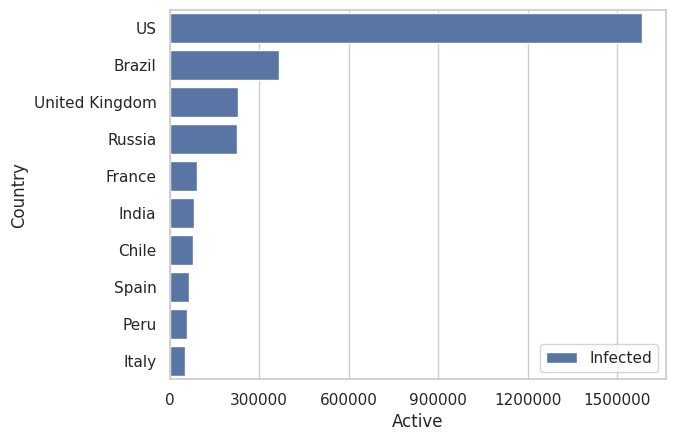

In [74]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
ax.xaxis.get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, 1600000, step=300000))

sns.barplot(x="Active", y="Country", data=groupeddf.sort_values('Active', ascending=False).head(10),
            label="Infected", color="b")

## Ekstra udfordring: Kortvisualisering med Plotly
**Plotly** er et Python-bibliotek til interaktive visualiseringer, der kan bruges direkte i Jupyter Notebooks, Python scripts eller integreres i webapps. Det kan lave alt fra simple linjediagrammer til avancerede 3D-grafer og kort.

**Plotly Express** er en “hurtig” version af **Plotly**, der gør det nemt at lave grafer med få linjer kode. Det minder meget om seaborn eller pandas.plot, men med interaktivitet. 

Kig lidt ind i https://plotly.com/python/plotly-express/ og bruge `plotly.express.choropleth` til at lave et interaktivt verdenskort, hvor landene farves efter antallet af bekræftede COVID-19-tilfælde (eller dødsfald) på en given dato.